In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit

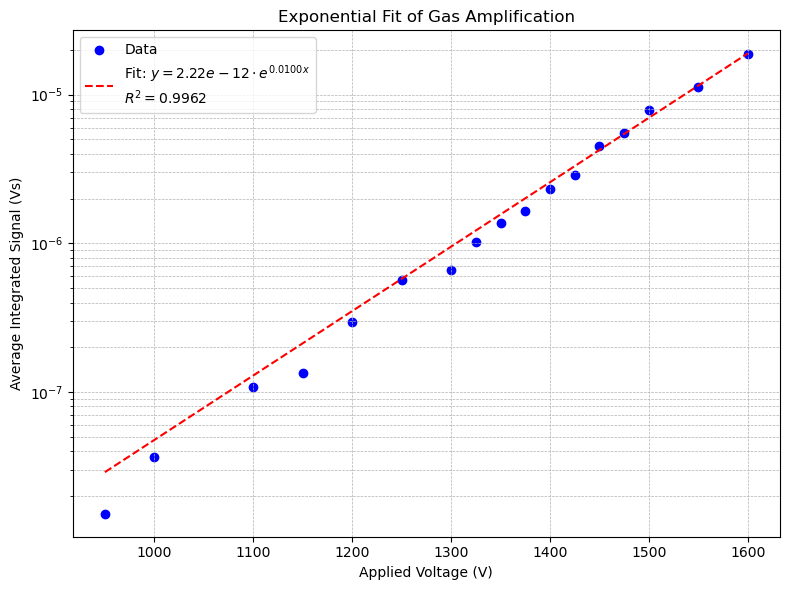

Fitted Equation: y = 2.22e-12 * exp(0.0100 * x)
R^2 = 0.9962


In [2]:
df = pd.read_csv('1a_average_integrated_signal-Copy1.csv') 

# Extract x and y
x = df['applied_voltage_V'].values
y = df['average_integrated_signal_Vs'].values

# Define the exponential function
def exp_func(x, K, C):
    return K * np.exp(C * x)

# Fit the model to the data
params, _ = curve_fit(exp_func, x, y, p0=(1e-9, 0.01))
K, C = params

# Calculate fitted values
y_fit = exp_func(x, K, C)

# Compute R^2
residuals = y - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_fit, label=fr'Fit: $y = {K:.2e} \cdot e^{{{C:.4f}x}}$' + f'\n$R^2 = {r_squared:.4f}$',
         color='red', linestyle='--')

plt.xlabel('Applied Voltage (V)')
plt.ylabel('Average Integrated Signal (Vs)')
plt.title('Exponential Fit of Gas Amplification')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Print R^2 and parameters
print(f"Fitted Equation: y = {K:.2e} * exp({C:.4f} * x)")
print(f"R^2 = {r_squared:.4f}")

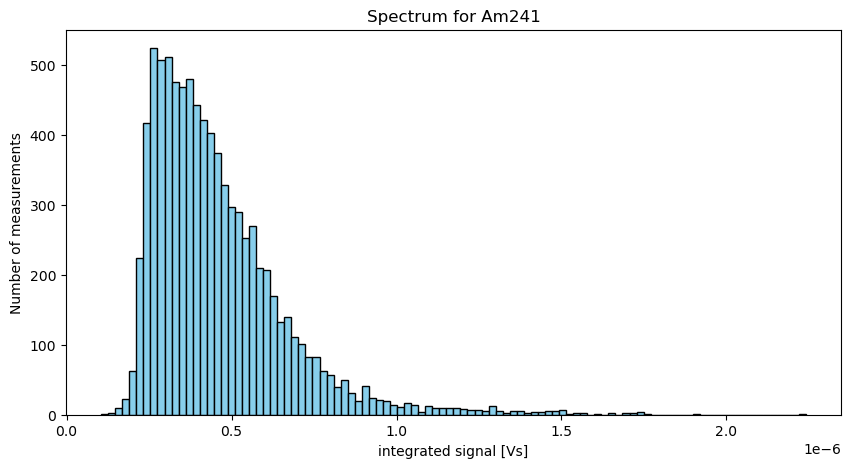

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('1b_integrated_signal_AM-Copy1.csv') 

# Extract and clean data
data = df['integrated_signal_Vs'].values
data = data[np.isfinite(data)]

# Create figure and axes
fig, axs = plt.subplots(figsize=(10, 5))

# Plot histogram only
axs.hist(data, bins=100, color='skyblue', edgecolor='black')

# Labels and title
axs.set_xlabel("integrated signal [Vs]")
axs.set_ylabel("Number of measurements")
axs.set_title("Spectrum for Am241")

# Save and show plot
plt.savefig("1b/1b_spectrum_AM.png")
plt.show()


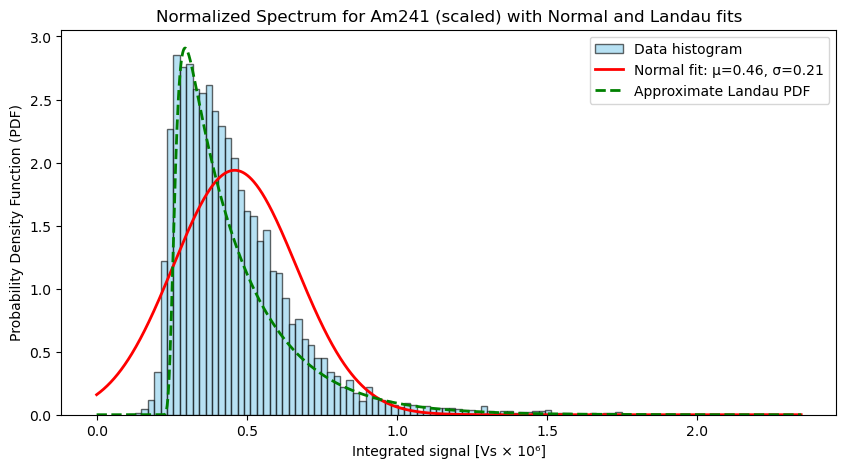

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load data
df = pd.read_csv('1b_integrated_signal_AM-Copy1.csv') 

# Extract and clean data
data = df['integrated_signal_Vs'].values
data = data[np.isfinite(data)]

# Scale x-axis data by 10^6
data_scaled = data * 1e6

# Create figure and axes
fig, axs = plt.subplots(figsize=(10, 5))

# Plot normalized histogram with scaled data
axs.hist(data_scaled, bins=100, color='skyblue', edgecolor='black', density=True, alpha=0.6, label='Data histogram')

# Fit a normal distribution to the scaled data
mu, std = norm.fit(data_scaled)

# Generate points for the PDF curve (Normal)
xmin, xmax = axs.get_xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)

# Plot the fitted PDF curve (Normal)
axs.plot(x, p, 'r-', linewidth=2, label=f'Normal fit: μ={mu:.2f}, σ={std:.2f}')

# --- Landau Approximate PDF ---

from scipy.special import erf  # You imported this already

def landau_pdf(x):
    # Approximate Landau PDF (not exact)
    xi = 0.015
    mpv = 0.23
    c = 0.2
    return np.exp(-(x - mpv + np.exp(-(x - mpv)/xi))/c)

# Define x-range for Landau PDF; let's match it roughly with data scale
x_landau = np.linspace(xmin, xmax, 1000)
y_landau = landau_pdf(x_landau)

# Normalize Landau PDF so its max is comparable to the normal PDF peak for visualization
y_landau_scaled = 1.5*y_landau / np.max(y_landau) * np.max(p)

# Plot the approximate Landau PDF
axs.plot(x_landau, y_landau_scaled, 'g--', linewidth=2, label='Approximate Landau PDF')

# Labels and title
axs.set_xlabel("Integrated signal [Vs × 10⁶]")
axs.set_ylabel("Probability Density Function (PDF)")
axs.set_title("Normalized Spectrum for Am241 (scaled) with Normal and Landau fits")

# Add legend
axs.legend()

# Save and show plot
plt.savefig("1b/1b_spectrum_AM_normalized_scaled_with_fit_and_landau.png")
plt.show()


C:\Users\YAYA\AppData\Local\Temp\ipykernel_4320\287666310.py:13: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-(x - mpv + np.exp(-(x - mpv)/xi))/c)


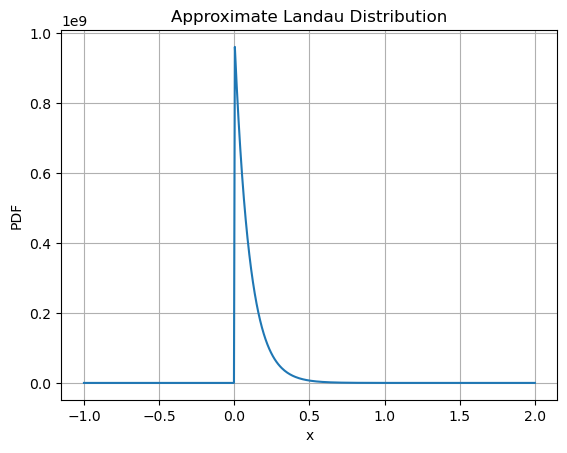

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Approximate Landau PDF implementation:
def landau_pdf(x):
    # This is a rough approximation, not exact.
    # Parameters from typical Landau fit:
    xi = 0
    mpv = 0
    c =0.1
    # Approximate using a formula from literature (this is simplified)
    return np.exp(-(x - mpv + np.exp(-(x - mpv)/xi))/c)
x = np.linspace(-1, 2,500)
y = 1e9*landau_pdf(x)

plt.plot(x, y)
plt.title('Approximate Landau Distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.grid(True)
plt.show()

In [33]:
import ROOT
import numpy as np

# Generate dummy data following Landau distribution
landau = ROOT.TF1("landau", "landau", 0, 10)
hist = ROOT.TH1F("hist", "Landau Fit Example", 100, 0, 10)

for _ in range(10000):
    value = landau.GetRandom()  # Generate value from Landau
    hist.Fill(value)

# Fit the histogram with a Landau function
fit_func = ROOT.TF1("fit_func", "landau", 0, 10)
hist.Fit("fit_func", "R")  # "R" restricts the fit to the defined range

# Draw result
canvas = ROOT.TCanvas()
hist.Draw()
fit_func.Draw("same")
canvas.SaveAs("landau_fit.png")  # Save image

ModuleNotFoundError: No module named 'ROOT'

In [34]:
c


SyntaxError: invalid syntax (2140336037.py, line 1)